## Modelo de detección de caras y géneros.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import cv2
from skimage.io import imread
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle




 Primero cargamos el csv relacionado con 200000 imagenes de famosos sacado de [este](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset) enlace de kaggle.

In [3]:
df_data_img = pd.read_csv("../Modelo_train/list_attr_celeba.csv")


In [4]:
df_data_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [5]:
df_data_img[df_data_img == -1] 

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0           NaN              -1.0              NaN         NaN   
1           NaN              -1.0             -1.0        -1.0   
2           NaN              -1.0             -1.0        -1.0   
3           NaN              -1.0             -1.0         NaN   
4           NaN              -1.0              NaN         NaN   
...         ...               ...              ...         ...   
202594      NaN              -1.0             -1.0         NaN   
202595      NaN              -1.0             -1.0        -1.0   
202596      NaN              -1.0             -1.0        -1.0   
202597      NaN              -1.0              NaN         NaN   
202598      NaN              -1.0              NaN         NaN   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                  -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   
1                   NaN  -1.0   -1.0      -1.0       NaN        -1.0  ...   
2                  -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
3                  -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   
4                  -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594             -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
202595             -1.0  -1.0    NaN       NaN      -1.0        -1.0  ...   
202596             -1.0  -1.0   -1.0      -1.0      -1.0         NaN  ...   
202597             -1.0  -1.0   -1.0       NaN      -1.0         NaN  ...   
202598             -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0            -1.0      NaN            NaN       -1.0               NaN   
1            -1.0      NaN           -1.0       -1.0              -1.0   
2            -1.0     -1.0           -1.0        NaN              -1.0   
3            -1.0     -1.0            NaN       -1.0               NaN   
4            -1.0     -1.0           -1.0       -1.0              -1.0   
...           ...      ...            ...        ...               ...   
202594       -1.0     -1.0           -1.0       -1.0              -1.0   
202595       -1.0      NaN            NaN       -1.0              -1.0   
202596       -1.0      NaN           -1.0       -1.0              -1.0   
202597       -1.0      NaN           -1.0        NaN               NaN   
202598       -1.0     -1.0           -1.0        NaN              -1.0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0              -1.0               NaN              -1.0             -1.0   
1              -1.0              -1.0              -1.0             -1.0   
2              -1.0              -1.0              -1.0             -1.0   
3              -1.0               NaN               NaN             -1.0   
4              -1.0               NaN              -1.0             -1.0   
...             ...               ...               ...              ...   
202594         -1.0               NaN              -1.0             -1.0   
202595         -1.0              -1.0              -1.0             -1.0   
202596         -1.0              -1.0              -1.0             -1.0   
202597         -1.0               NaN              -1.0             -1.0   
202598         -1.0               NaN              -1.0             -1.0   

        Young  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
202594    NaN  
202595    NaN  
202596    NaN  
202597    NaN  
202598    NaN  

[202599 rows x 41 columns]

In [6]:
df_data_img.replace(-1, 0, inplace=True)

In [7]:
df_data_img

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                     1     0      0         0         1           0  ...   
2                     0     0      0         1         0           0  ...   
3                     0     0      0         0         0           0  ...   
4                     0     0      0         1         0           0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594                0     0      0         1         0           0  ...   
202595                0     0      1         1         0           0  ...   
202596                0     0      0         0         0           1  ...   
202597                0     0      0         1         0           1  ...   
202598                0     0      0         0         0           0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0               0        1              1          0                 1   
1               0        1              0          0                 0   
2               0        0              0          1                 0   
3               0        0              1          0                 1   
4               0        0              0          0                 0   
...           ...      ...            ...        ...               ...   
202594          0        0              0          0                 0   
202595          0        1              1          0                 0   
202596          0        1              0          0                 0   
202597          0        1              0          1                 1   
202598          0        0              0          1                 0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 1                 1                0   
4                 0                 1                 0                0   
...             ...               ...               ...              ...   
202594            0                 1                 0                0   
202595            0                 0                 0                0   
202596            0                 0                 0                0   
202597            0                 1                 0                0   
202598            0                 1                 0                0   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [8]:
df_data_img_corto = df_data_img[["image_id","Male"]]

In [9]:
df_data_img_corto

image_id  Male
0       000001.jpg     0
1       000002.jpg     0
2       000003.jpg     1
3       000004.jpg     0
4       000005.jpg     0
...            ...   ...
202594  202595.jpg     0
202595  202596.jpg     1
202596  202597.jpg     1
202597  202598.jpg     0
202598  202599.jpg     0

[202599 rows x 2 columns]

In [ ]:
df_data_img_corto["image_id"] = df_data_img_corto["image_id"].str.replace(r"\.jpg$", "", regex=True)

Miramos si está o no balanceada el target, en este caso el género

In [11]:
df_data_img_corto

image_id  Male
0        000001     0
1        000002     0
2        000003     1
3        000004     0
4        000005     0
...         ...   ...
202594   202595     0
202595   202596     1
202596   202597     1
202597   202598     0
202598   202599     0

[202599 rows x 2 columns]

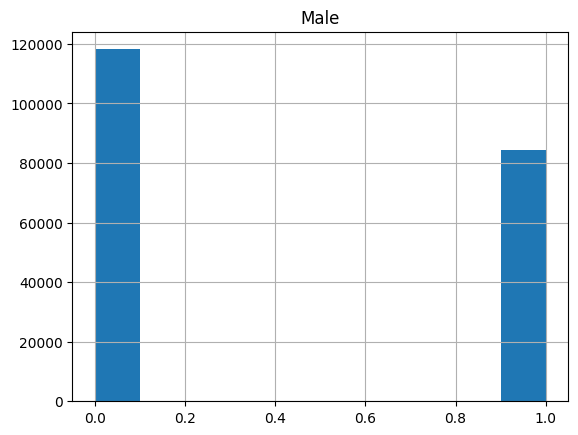

In [12]:
df_data_img_corto.hist();

In [13]:
train = df_data_img_corto[:180000]
test = df_data_img_corto[180000:]

In [14]:
train.tail()

image_id  Male
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

In [15]:
train.tail()

image_id  Male
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

In [16]:
train["Male"].value_counts()

Male
0    104387
1     75613
Name: count, dtype: int64

In [17]:
test["Male"].value_counts()

Male
0    13778
1     8821
Name: count, dtype: int64

In [19]:
TRAIN_PATH = "../Modelo_train/train/"
TEST_PATH = "../Modelo_train/test/"

Nuevo aproach

In [23]:
main_dir = TRAIN_PATH

In [21]:
train

image_id  Male
0        000001     0
1        000002     0
2        000003     1
3        000004     0
4        000005     0
...         ...   ...
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

[180000 rows x 2 columns]

Mostramos una imagen aleatoria del dataset de imagenes

(218, 178, 3)
255


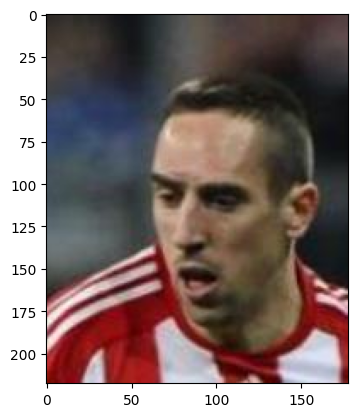

In [31]:
archivos_carpeta = os.listdir(main_dir)

imagen_aleatoria = random.choice(archivos_carpeta)
imagen_path = os.path.join(main_dir,imagen_aleatoria)

image = imread(imagen_path)

print(image.shape)
print(np.max(image))
plt.imshow(image)
plt.show()

Redimensionamos todas las imagenes a 64*64

In [33]:
X = []
y = []

for _, row in train.iterrows():
    image_path = os.path.join(TRAIN_PATH, row['image_id'] + ".jpg",)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        continue
    
    image = cv2.resize(image, (64, 64)) 
    X.append(image)
    y.append(row['Male'])

# Convertimos X e y en arrays de numpy
X = np.array(X)
y = np.array(y)

Dividimos entre train y test 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)

(144000, 64, 64, 3)
(36000, 64, 64, 3)


In [36]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [37]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


Entrenamos el modelo convolucional.

In [38]:
layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]

model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
4500/4500 [==============================] - 241s 53ms/step - loss: 0.0690 - accuracy: 0.9739 - val_loss: 0.0831 - val_accuracy: 0.9690
Epoch 2/2
4500/4500 [==============================] - 238s 53ms/step - loss: 0.0566 - accuracy: 0.9788 - val_loss: 0.0867 - val_accuracy: 0.9678


Guardamos el modelo creado.

In [43]:
import pickle

In [44]:
pickle.dump(model, open("modelo_caras.pkl", 'wb'))

Ahora vamos a hacer las predicciones respecto al test

In [49]:
# Hacer predicciones en X_test
predictions = model.predict(X_test)

# Comparar las etiquetas predichas con las etiquetas reales
for i in range(len(X_test)):
    print("Imagen:", i)
    print("Etiqueta real:", y_test[i])
    print("Etiqueta predicha:", predictions[i])
    print()

1125/1125 [==============================] - 13s 11ms/step
Imagen: 0
Etiqueta real: 0
Etiqueta predicha: [0.04570725]

Imagen: 1
Etiqueta real: 1
Etiqueta predicha: [0.9999983]

Imagen: 2
Etiqueta real: 0
Etiqueta predicha: [0.00107722]

Imagen: 3
Etiqueta real: 0
Etiqueta predicha: [0.03448947]

Imagen: 4
Etiqueta real: 0
Etiqueta predicha: [2.164187e-05]

Imagen: 5
Etiqueta real: 0
Etiqueta predicha: [0.00042302]

Imagen: 6
Etiqueta real: 0
Etiqueta predicha: [0.00014061]

Imagen: 7
Etiqueta real: 0
Etiqueta predicha: [8.537638e-05]

Imagen: 8
Etiqueta real: 1
Etiqueta predicha: [0.98773736]

Imagen: 9
Etiqueta real: 0
Etiqueta predicha: [9.650538e-05]

Imagen: 10
Etiqueta real: 1
Etiqueta predicha: [0.9980203]

Imagen: 11
Etiqueta real: 1
Etiqueta predicha: [0.9939482]

Imagen: 12
Etiqueta real: 1
Etiqueta predicha: [0.99999976]

Imagen: 13
Etiqueta real: 1
Etiqueta predicha: [0.9713127]

Imagen: 14
Etiqueta real: 0
Etiqueta predicha: [2.475997e-06]

Imagen: 15
Etiqueta real: 1
Etiq

### Probando el modelo con imagen

In [140]:
def redondeo_pred(prediccion):
    if np.round(prediccion,0) == 1:
        gen = "Hombre"
    else:
        gen = "Mujer"
    return gen

In [201]:
import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

img_original = cv2.imread("../img/faces/7.jpg")
img_detect = cv2.imread("../img/faces/7.jpg")

# Convertimos a escala de grises
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
gray_dtect = cv2.cvtColor(img_detect, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered_detect = cv2.blur(gray_dtect, (3, 3))

# Detectamos las caras
faces = face_cascade.detectMultiScale(img_filtered_detect, 1.1, 4)

# Dibujamos rectangulo en cada cara
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in faces:
    cv2.rectangle(img_filtered_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)



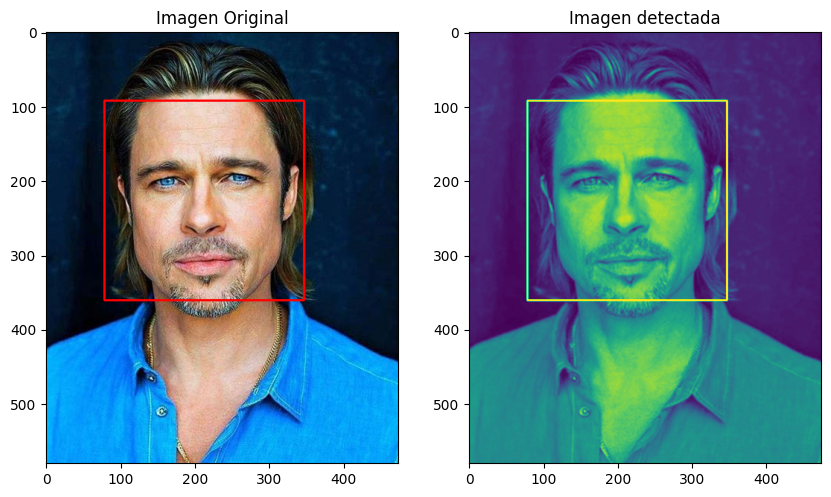

In [202]:
fig = plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(img_rgb)

plt.subplot(122)
plt.title('Imagen detectada')
plt.imshow(img_filtered_detect);

Hacemos las mismas conversiones realizadas durante la creación del modelo para que funcione correctamente.

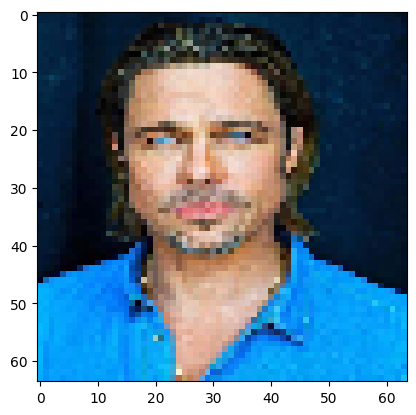

In [203]:
img_rgb_conv = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
img_conv = cv2.resize(img_rgb_conv, (64,64))


plt.imshow(img_conv)

In [204]:
img_conv_array = np.array(img_conv)

In [205]:
print(img_conv_array.shape)
print(img_conv_array.shape)
print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

(64, 64, 3)
(64, 64, 3)
Min: 0
Max: 255


In [206]:
img_conv_array = img_conv_array / 255.0

print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

Min: 0.0
Max: 1.0


In [207]:
img_conv_array = np.reshape(img_conv_array, (1, 64, 64, 3))

In [208]:
img_conv_array.shape

(1, 64, 64, 3)

In [5]:
with open('../model/modelo_caras.pkl', 'rb') as f:
    modelo_caras = pickle.load(f)

In [210]:
predictions_b = modelo_caras.predict(img_conv_array)

1/1 [==============================] - 0s 50ms/step


In [211]:
predictions_b[0][0]

0.93089855

In [212]:
cv2.putText(img_rgb,redondeo_pred(predictions_b), (x+8,y-8), cv2.FONT_ITALIC,0.7,(255,255,50),1)

array([[[  4,  35,  64],
        [  4,  35,  64],
        [  5,  36,  65],
        ...,
        [  3,  18,  39],
        [  1,  14,  33],
        [  1,  14,  33]],

       [[  4,  35,  64],
        [  4,  35,  64],
        [  4,  35,  64],
        ...,
        [  2,  17,  38],
        [  1,  14,  33],
        [  1,  14,  33]],

       [[  4,  35,  64],
        [  3,  34,  63],
        [  3,  34,  63],
        ...,
        [  2,  17,  38],
        [  0,  13,  32],
        [  0,  13,  32]],

       ...,

       [[ 21, 179, 253],
        [ 13, 173, 247],
        [ 10, 173, 250],
        ...,
        [  9, 185, 222],
        [ 16, 187, 231],
        [ 22, 190, 237]],

       [[ 29, 187, 255],
        [ 18, 178, 252],
        [ 13, 176, 253],
        ...,
        [  3, 172, 211],
        [ 28, 193, 239],
        [ 34, 196, 245]],

       [[ 35, 193, 255],
        [ 21, 181, 255],
        [ 14, 177, 254],
        ...,
        [  9, 177, 216],
        [ 32, 192, 240],
        [ 39, 196, 247]]

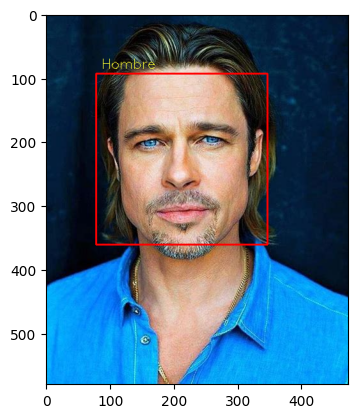

In [213]:
plt.imshow(img_rgb)

Probamos con una mujer también para ver si detecta bien ambos casos

In [214]:
import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

img_original = cv2.imread("../img/faces/180683.jpg")
img_detect = cv2.imread("../img/faces/180683.jpg")

# Convertimos a escala de grises
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
gray_dtect = cv2.cvtColor(img_detect, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered_detect = cv2.blur(gray_dtect, (3, 3))

# Detectamos las caras
faces = face_cascade.detectMultiScale(img_filtered_detect, 1.1, 4)

# Dibujamos rectangulo en cada cara
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in faces:
    cv2.rectangle(img_filtered_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)



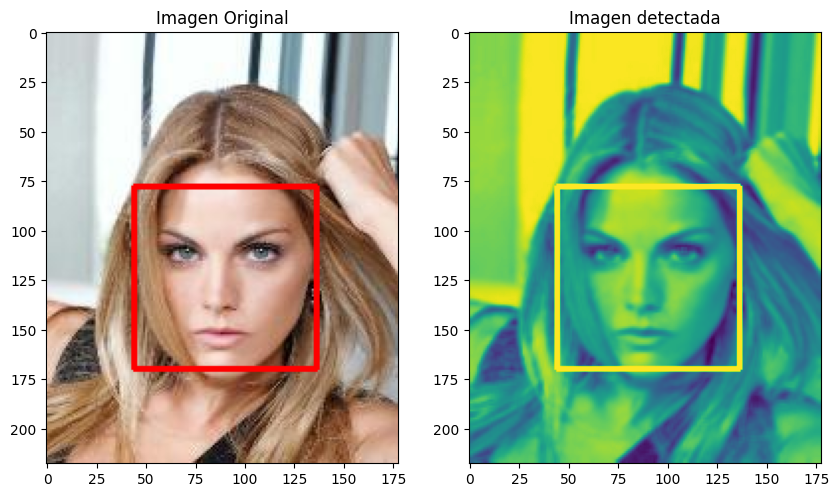

In [215]:
fig = plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(img_rgb)

plt.subplot(122)
plt.title('Imagen detectada')
plt.imshow(img_filtered_detect);

Conversión imagen

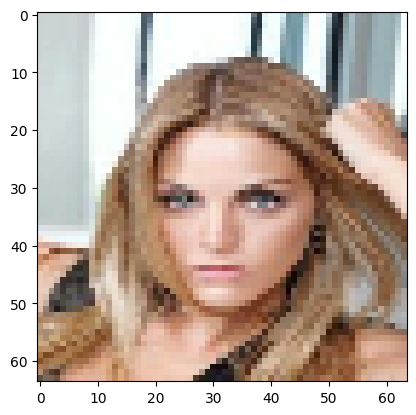

In [216]:
img_rgb_conv = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
img_conv = cv2.resize(img_rgb_conv, (64,64))


plt.imshow(img_conv)

In [217]:
img_conv_array = np.array(img_conv)

In [218]:
print(img_conv_array.shape)
print(img_conv_array.shape)
print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

(64, 64, 3)
(64, 64, 3)
Min: 0
Max: 255


In [219]:
img_conv_array = img_conv_array / 255.0

print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

Min: 0.0
Max: 1.0


In [220]:
img_conv_array = np.reshape(img_conv_array, (1, 64, 64, 3))

In [221]:
img_conv_array.shape

(1, 64, 64, 3)

In [4]:
with open('../model/modelo_caras.pkl', 'rb') as f:
    modelo_caras = pickle.load(f)

In [223]:
predictions_m = modelo_caras.predict(img_conv_array)

1/1 [==============================] - 0s 60ms/step


In [224]:
predictions_m[0][0]

0.009375595

In [225]:
cv2.putText(img_rgb,redondeo_pred(predictions_m), (x+8,y-8), cv2.FONT_ITALIC,0.7,(255,255,50),1)

array([[[203, 211, 213],
        [202, 210, 212],
        [201, 209, 211],
        ...,
        [220, 233, 239],
        [245, 255, 255],
        [246, 255, 255]],

       [[203, 211, 213],
        [202, 210, 212],
        [201, 209, 211],
        ...,
        [221, 234, 240],
        [245, 255, 255],
        [246, 255, 255]],

       [[203, 211, 213],
        [202, 210, 212],
        [201, 209, 211],
        ...,
        [223, 236, 242],
        [245, 255, 255],
        [246, 255, 255]],

       ...,

       [[100,  81,  66],
        [111,  92,  77],
        [112,  94,  80],
        ...,
        [221, 185, 169],
        [223, 184, 167],
        [225, 184, 166]],

       [[ 92,  79,  63],
        [ 91,  77,  64],
        [108,  94,  83],
        ...,
        [230, 197, 180],
        [230, 193, 175],
        [231, 192, 175]],

       [[115, 103,  89],
        [106,  94,  80],
        [108,  95,  86],
        ...,
        [230, 197, 180],
        [232, 195, 179],
        [233, 194, 177]]

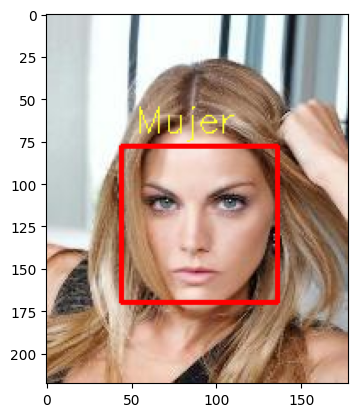

In [226]:
plt.imshow(img_rgb)

Como vemos funciona de manera correcta el modelo.